In [1]:
%pip install pillow opencv-python tqdm


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 2.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import random
import numpy as np
from PIL import Image, ImageEnhance, ImageFilter
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
def enhance_image(image):
    # Convert the image to RGB if it is not already in RGB mode
    image = image.convert('RGB')

    # Enhance the sharpness
    enhancer = ImageEnhance.Sharpness(image)
    image = enhancer.enhance(2.0)  # Increase sharpness by a factor of 2

    # Enhance the contrast
    enhancer = ImageEnhance.Contrast(image)
    image = enhancer.enhance(1.5)  # Increase contrast by a factor of 1.5

    # Enhance the brightness
    enhancer = ImageEnhance.Brightness(image)
    image = enhancer.enhance(1.2)  # Slightly increase brightness

    # Reduce noise using Gaussian blur filter
    image = image.filter(ImageFilter.GaussianBlur(radius=1))

    return image

In [3]:
def get_image_statistics(image):
    img_np = np.array(image)
    return {
        "width": image.width,
        "height": image.height,
        "min_pixel": img_np.min(),
        "max_pixel": img_np.max(),
        "mean_pixel": img_np.mean()
    }

In [4]:
# Function to display the statistics
def display_statistics(stats, title="Image Statistics"):
    print(f"{title}:")
    for k, v in stats.items():
        print(f"  {k}: {v}")
    print()

In [5]:
# Function to plot image and its histogram
def plot_image_and_histogram(original_img, enhanced_img, original_stats, enhanced_stats, image_title):
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    # Original Image
    axs[0, 0].imshow(original_img)
    axs[0, 0].set_title(f"Original Image: {image_title}")
    axs[0, 0].axis('off')

    # Enhanced Image
    axs[0, 1].imshow(enhanced_img)
    axs[0, 1].set_title(f"Enhanced Image: {image_title}")
    axs[0, 1].axis('off')

    # Histogram for Original Image
    axs[1, 0].hist(np.array(original_img).ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)
    axs[1, 0].set_title(f"Original Histogram: {image_title}")

    # Histogram for Enhanced Image
    axs[1, 1].hist(np.array(enhanced_img).ravel(), bins=256, range=(0, 256), color='green', alpha=0.7)
    axs[1, 1].set_title(f"Enhanced Histogram: {image_title}")

    plt.tight_layout()
    plt.show()

In [6]:
# Function to pick random images, enhance, compare, and save results
def compare_images_before_after(input_dir, output_dir, num_samples=3):
    # Ensure output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Get list of all images
    image_files = [os.path.join(dp, f) for dp, dn, filenames in os.walk(input_dir) for f in filenames if f.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]

    # Pick random sample of images
    random_images = random.sample(image_files, num_samples)

    for img_path in random_images:
        try:
            # Open the original image
            original_img = Image.open(img_path)

            # Get statistics for original image
            original_stats = get_image_statistics(original_img)

            # Enhance the image
            enhanced_img = enhance_image(original_img)

            # Get statistics for enhanced image
            enhanced_stats = get_image_statistics(enhanced_img)

            # Display statistics for both original and enhanced images
            print(f"\nComparing '{os.path.basename(img_path)}':")
            display_statistics(original_stats, title="Original Image Statistics")
            display_statistics(enhanced_stats, title="Enhanced Image Statistics")

            # Plot and visualize the images and their histograms
            plot_image_and_histogram(original_img, enhanced_img, original_stats, enhanced_stats, os.path.basename(img_path))

            # Save the enhanced image to the output directory, preserving the folder structure
            relative_path = os.path.relpath(img_path, input_dir)
            output_image_path = os.path.join(output_dir, relative_path)
            output_image_folder = os.path.dirname(output_image_path)

            if not os.path.exists(output_image_folder):
                os.makedirs(output_image_folder)

            enhanced_img.save(output_image_path)
            print(f"Enhanced image saved to: {output_image_path}")

        except Exception as e:
            print(f"Failed to process {img_path}: {e}")

In [7]:
# def process_images_in_classes(main_input_dir, main_output_dir):
#     # Loop through each class folder
#     for class_folder in os.listdir(main_input_dir):
#         class_input_dir = os.path.join(main_input_dir, class_folder)
        
#         # Check if the path is a directory (to avoid processing any non-folder files)
#         if os.path.isdir(class_input_dir):
#             class_output_dir = os.path.join(main_output_dir, class_folder)
            
#             # Ensure output class directory exists
#             if not os.path.exists(class_output_dir):
#                 os.makedirs(class_output_dir)

#             # Get list of image files in the current class folder
#             image_files = [f for f in os.listdir(class_input_dir) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]

#             # Loop through and process each image in the class folder
#             for image_file in tqdm(image_files, desc=f"Processing {class_folder} images"):
#                 input_path = os.path.join(class_input_dir, image_file)
#                 output_path = os.path.join(class_output_dir, image_file)

#                 try:
#                     # Open the image using PIL
#                     with Image.open(input_path) as img:
#                         # Enhance the image
#                         enhanced_img = enhance_image(img)

#                         # Save the enhanced image to the output class directory
#                         enhanced_img.save(output_path)

#                 except Exception as e:
#                     print(f"Failed to process {image_file}: {e}")

In [8]:
# Paths to your input and output directories
input_directory = '/home/idrone2/Desktop/rk/chest_xray'
output_directory = '/home/idrone2/Desktop/enchanced_chest_xray'


Comparing 'person475_bacteria_2025.jpeg':
Original Image Statistics:
  width: 1411
  height: 915
  min_pixel: 0
  max_pixel: 239
  mean_pixel: 115.68743943953248

Enhanced Image Statistics:
  width: 1411
  height: 915
  min_pixel: 0
  max_pixel: 255
  mean_pixel: 140.79718449497122



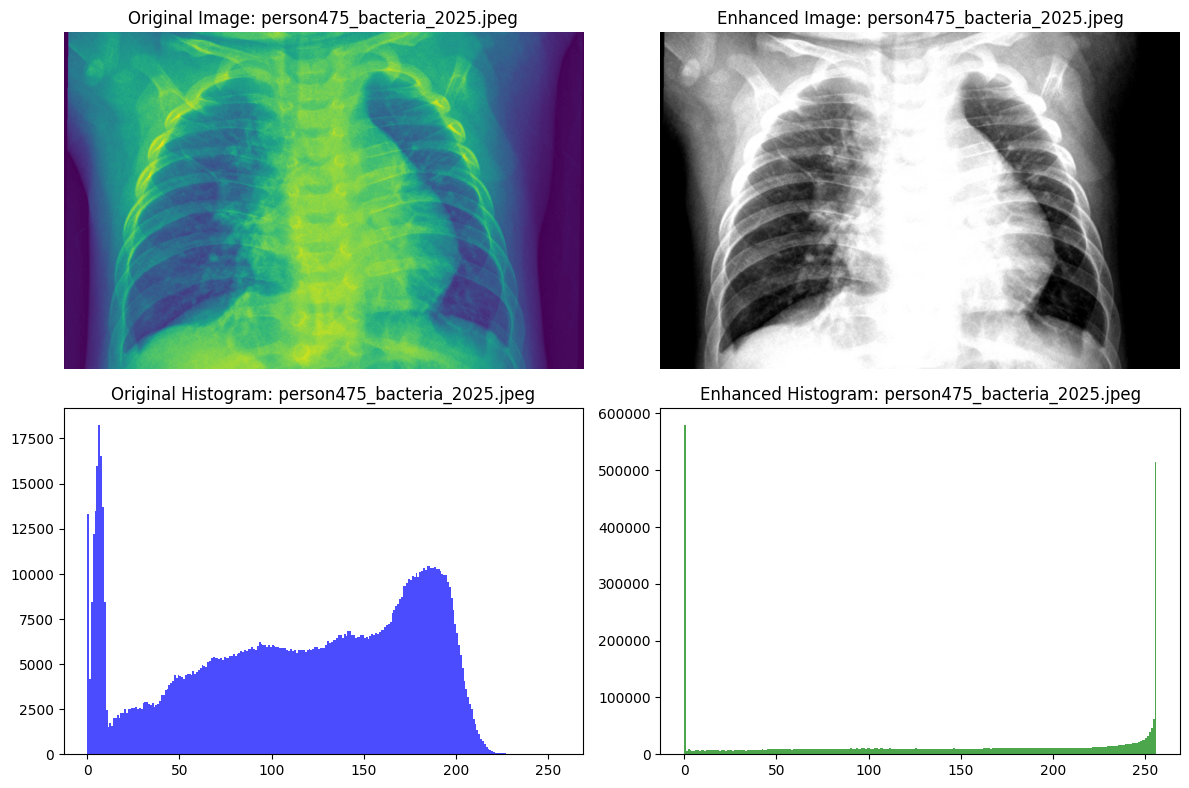

Enhanced image saved to: /home/idrone2/Desktop/enchanced_chest_xray/bact_pneumo/person475_bacteria_2025.jpeg

Comparing 'NORMAL2-IM-1338-0001.jpeg':
Original Image Statistics:
  width: 2252
  height: 1936
  min_pixel: 0
  max_pixel: 255
  mean_pixel: 109.05936481621478

Enhanced Image Statistics:
  width: 2252
  height: 1936
  min_pixel: 0
  max_pixel: 255
  mean_pixel: 133.32549923483992



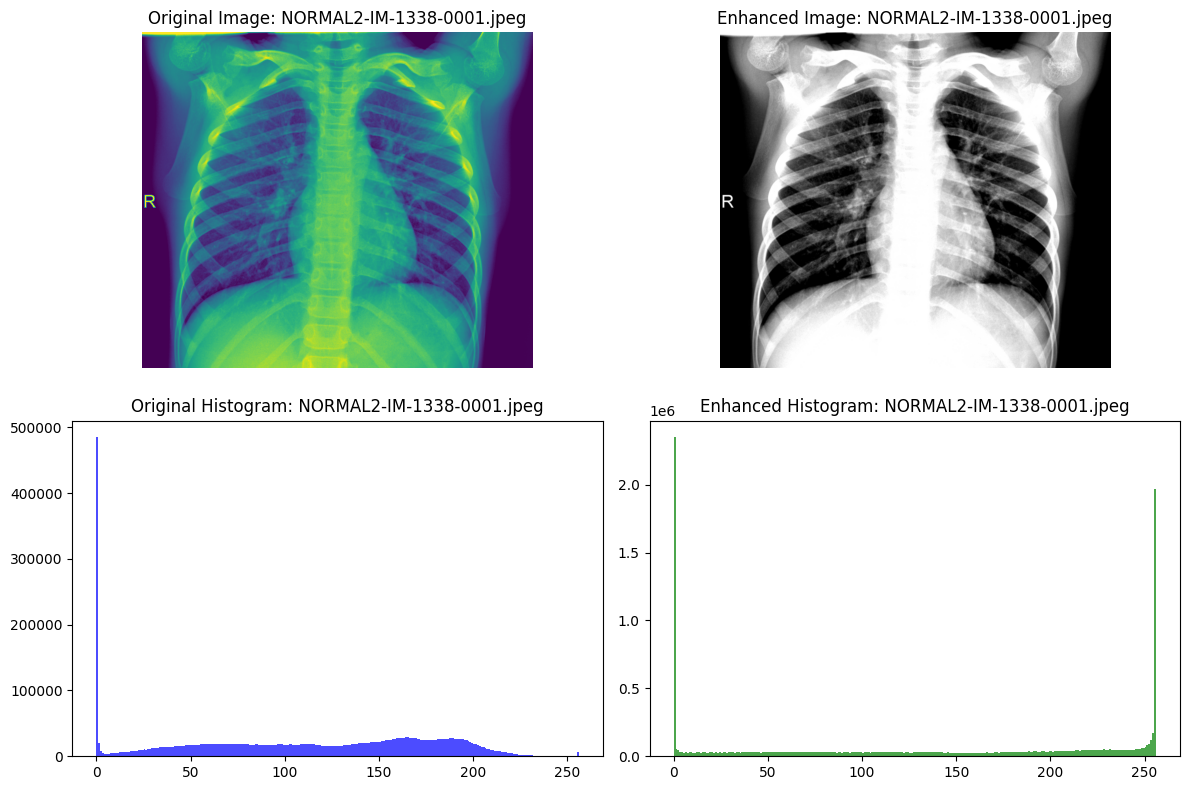

Enhanced image saved to: /home/idrone2/Desktop/enchanced_chest_xray/normal/NORMAL2-IM-1338-0001.jpeg

Comparing 'person583_virus_1127.jpeg':
Original Image Statistics:
  width: 1280
  height: 712
  min_pixel: 0
  max_pixel: 255
  mean_pixel: 121.35486525632022

Enhanced Image Statistics:
  width: 1280
  height: 712
  min_pixel: 0
  max_pixel: 255
  mean_pixel: 152.68101299157303



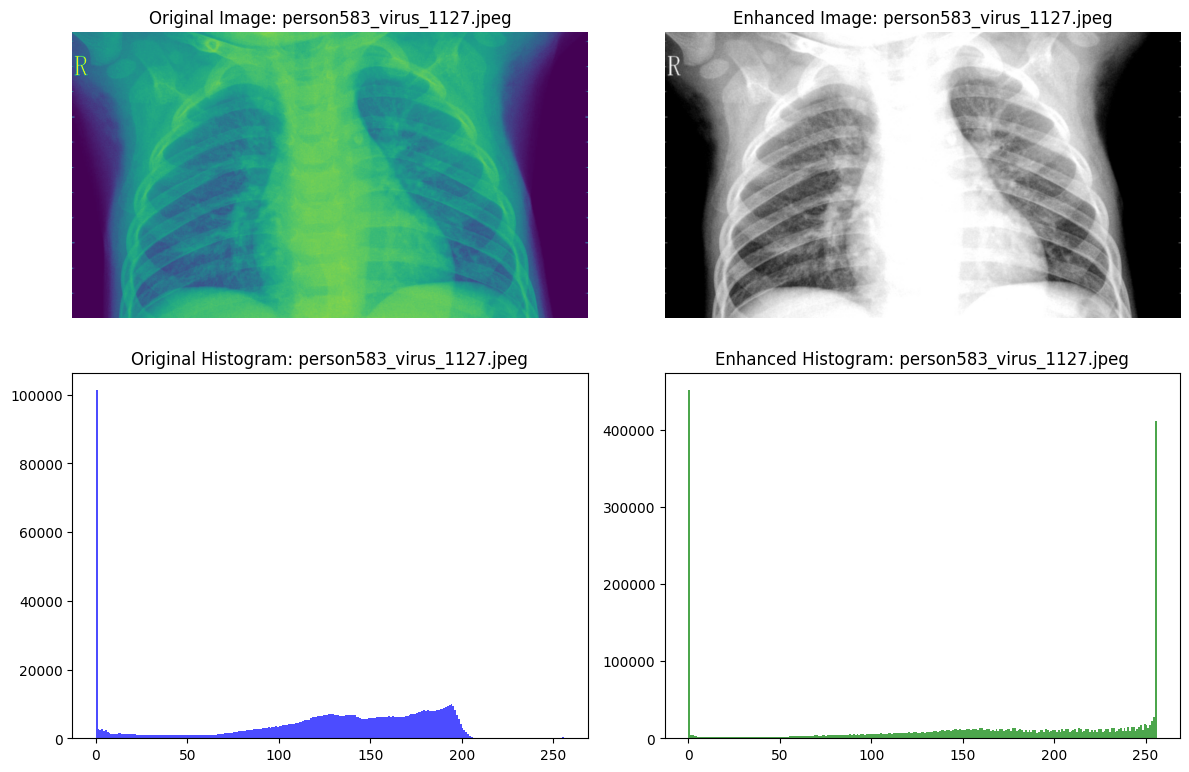

Enhanced image saved to: /home/idrone2/Desktop/enchanced_chest_xray/viral_pneumo/person583_virus_1127.jpeg


In [9]:

# Compare random images before and after preprocessing and save enhanced images
compare_images_before_after(input_directory, output_directory, num_samples=3)

Image width statistics:
Mean: 1327.880806010929
Median: 1281.0
Min: 384
Max: 2916

Image height statistics:
Mean: 970.6890368852459
Median: 888.0
Min: 127
Max: 2713


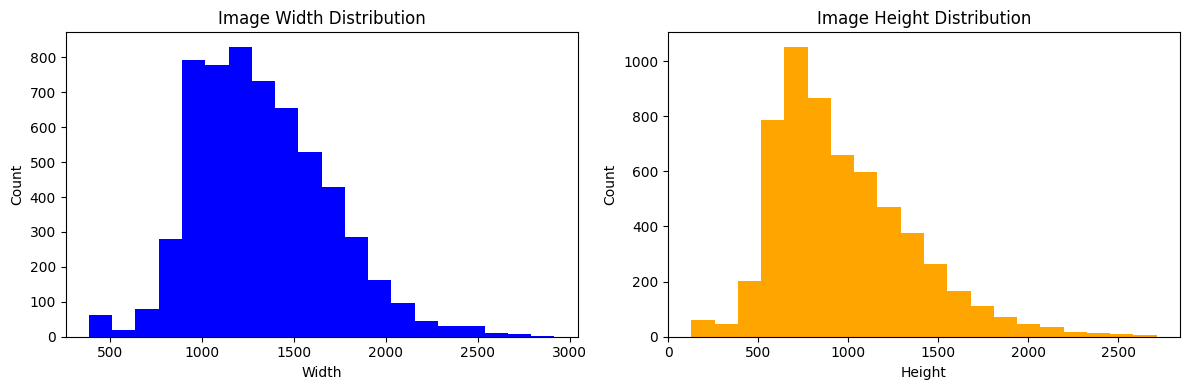

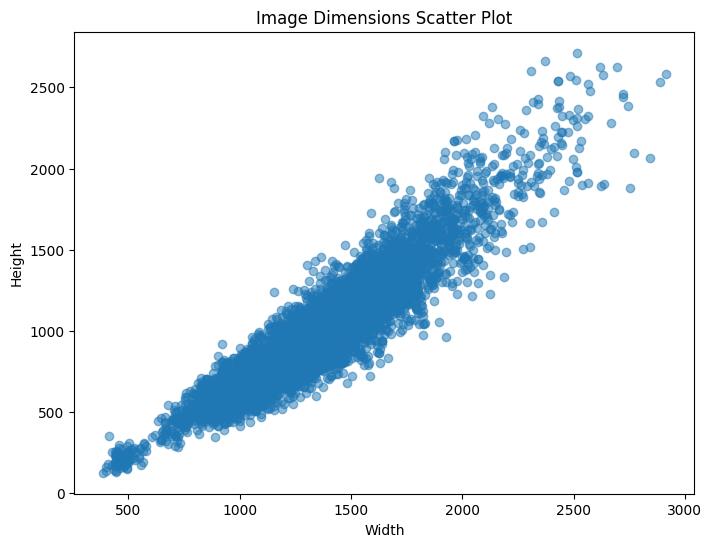


Class: bact_pneumo


TypeError: 'int' object is not subscriptable

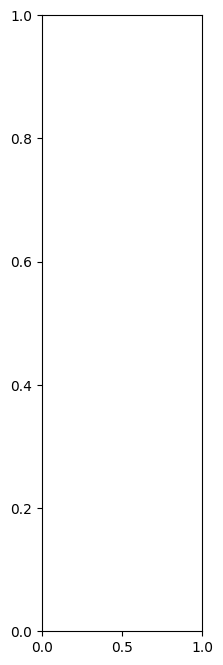

In [10]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import torchvision.datasets as datasets

# Load the dataset
dataset_path = '/home/idrone2/Desktop/rk/chest_xray'  # Replace with your dataset path
dataset = datasets.ImageFolder(dataset_path)

# Analyze image dimensions
image_widths = []
image_heights = []

for image, _ in dataset:
    image_widths.append(image.size[0])
    image_heights.append(image.size[1])

# Print statistics
print("Image width statistics:")
print(f"Mean: {np.mean(image_widths)}")
print(f"Median: {np.median(image_widths)}")
print(f"Min: {np.min(image_widths)}")
print(f"Max: {np.max(image_widths)}")

print("\nImage height statistics:")
print(f"Mean: {np.mean(image_heights)}")
print(f"Median: {np.median(image_heights)}")
print(f"Min: {np.min(image_heights)}")
print(f"Max: {np.max(image_heights)}")

# Visualize image dimensions distribution
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(image_widths, bins=20, color='blue', label='Width')
plt.xlabel('Width')
plt.ylabel('Count')
plt.title('Image Width Distribution')

plt.subplot(1, 2, 2)
plt.hist(image_heights, bins=20, color='orange', label='Height')
plt.xlabel('Height')
plt.ylabel('Count')
plt.title('Image Height Distribution')

plt.tight_layout()
plt.show()

# Visualize image dimensions scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(image_widths, image_heights, alpha=0.5)
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Image Dimensions Scatter Plot')
plt.show()

# Visualize sample images from each class
num_samples_per_class = 5

for class_index, (class_dir, class_images) in enumerate(dataset.class_to_idx.items()):
    print(f"\nClass: {class_dir}")
    plt.figure(figsize=(12, 8))
    for i in range(num_samples_per_class):
        plt.subplot(1, num_samples_per_class, i + 1)
        plt.imshow(class_images[i])
        plt.axis('off')
    plt.show()

Image width statistics:
Mean: 128.0
Median: 128.0
Min: 128
Max: 128

Image height statistics:
Mean: 128.0
Median: 128.0
Min: 128
Max: 128


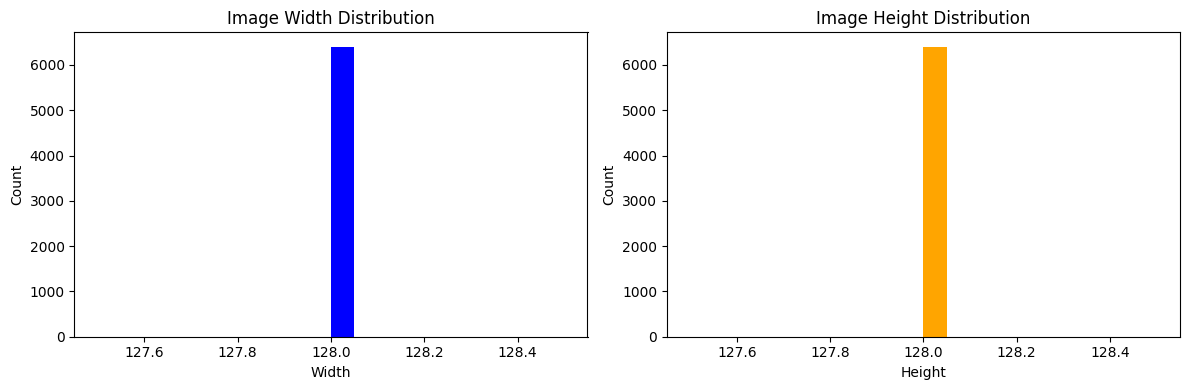

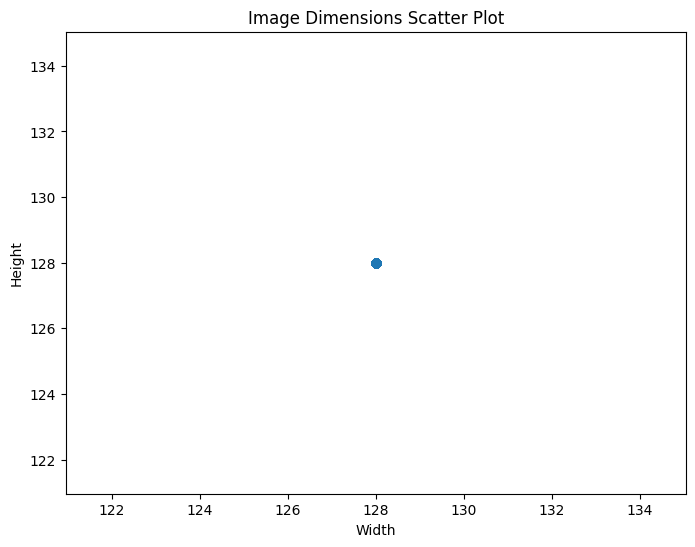


Class: Mild_Demented


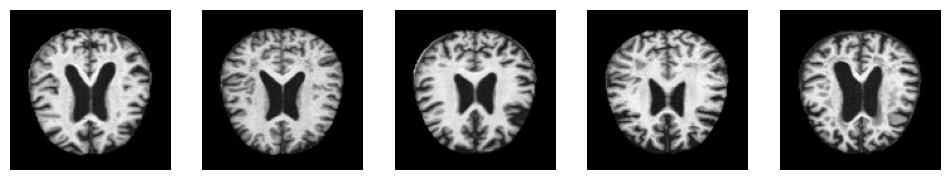


Class: Moderate_Demented


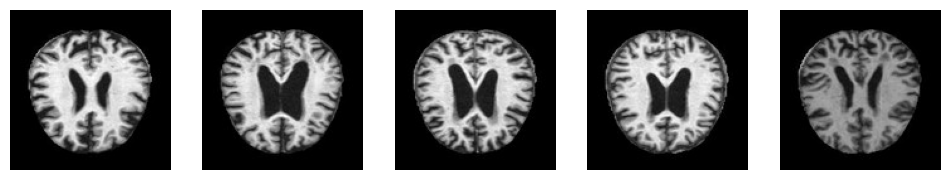


Class: Non_Demented


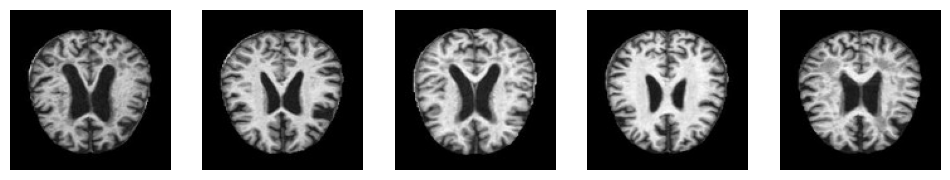


Class: Very_Mild_Demented


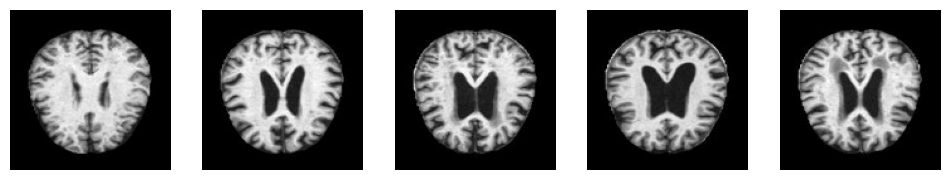

In [4]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import torchvision.datasets as datasets

# Load the dataset
dataset_path = '/home/idrone2/Desktop/rk/Alzheimer_dataset'  # Replace with your dataset path
dataset = datasets.ImageFolder(dataset_path)

# Analyze image dimensions
image_widths = []
image_heights = []

for image, _ in dataset:
    image_widths.append(image.size[0])
    image_heights.append(image.size[1])

# Print statistics
print("Image width statistics:")
print(f"Mean: {np.mean(image_widths)}")
print(f"Median: {np.median(image_widths)}")
print(f"Min: {np.min(image_widths)}")
print(f"Max: {np.max(image_widths)}")

print("\nImage height statistics:")
print(f"Mean: {np.mean(image_heights)}")
print(f"Median: {np.median(image_heights)}")
print(f"Min: {np.min(image_heights)}")
print(f"Max: {np.max(image_heights)}")

# Visualize image dimensions distribution
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(image_widths, bins=20, color='blue', label='Width')
plt.xlabel('Width')
plt.ylabel('Count')
plt.title('Image Width Distribution')

plt.subplot(1, 2, 2)
plt.hist(image_heights, bins=20, color='orange', label='Height')
plt.xlabel('Height')
plt.ylabel('Count')
plt.title('Image Height Distribution')

plt.tight_layout()
plt.show()

# Visualize image dimensions scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(image_widths, image_heights, alpha=0.5)
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Image Dimensions Scatter Plot')
plt.show()

# Visualize sample images from each class
num_samples_per_class = 5

for class_index, (class_dir, class_label) in enumerate(dataset.class_to_idx.items()):
    print(f"\nClass: {class_dir}")
    plt.figure(figsize=(12, 8))
    for i in range(num_samples_per_class):
        image, _ = dataset[class_label * num_samples_per_class + i]  # Access image using class label and index within class
        plt.subplot(1, num_samples_per_class, i + 1)
        plt.imshow(image)
        plt.axis('off')
    plt.show()

Image width statistics:
Mean: 128.0
Median: 128.0
Min: 128
Max: 128

Image height statistics:
Mean: 128.0
Median: 128.0
Min: 128
Max: 128


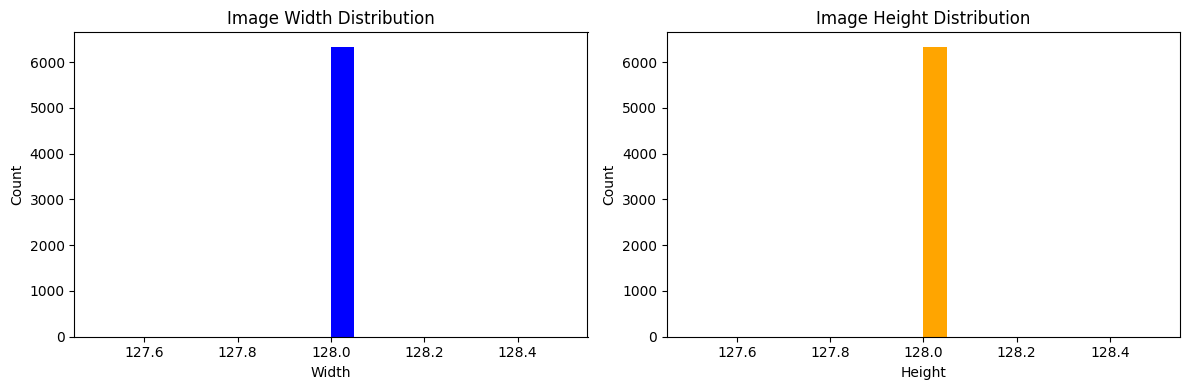

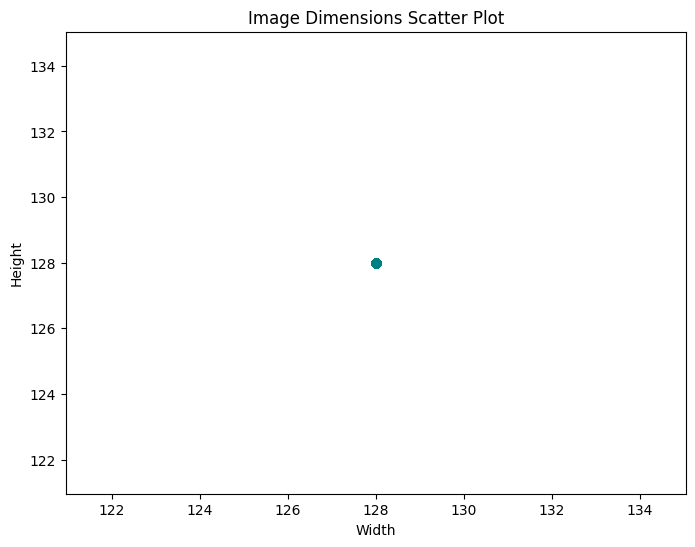


Class: Mild_Demented


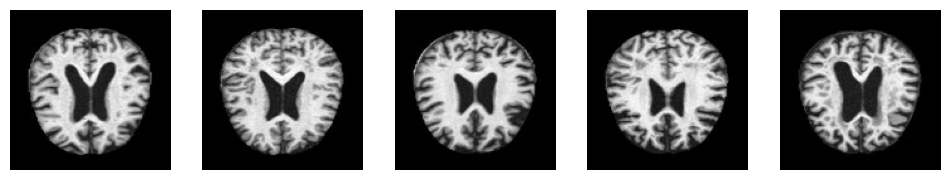


Class: Non_Demented


<Figure size 1200x800 with 0 Axes>


Class: Very_Mild_Demented


<Figure size 1200x800 with 0 Axes>


Image Intensity Statistics:
Mean: 71.07086841506187
Median: 71.68270874023438
Std Dev: 82.73619249504668


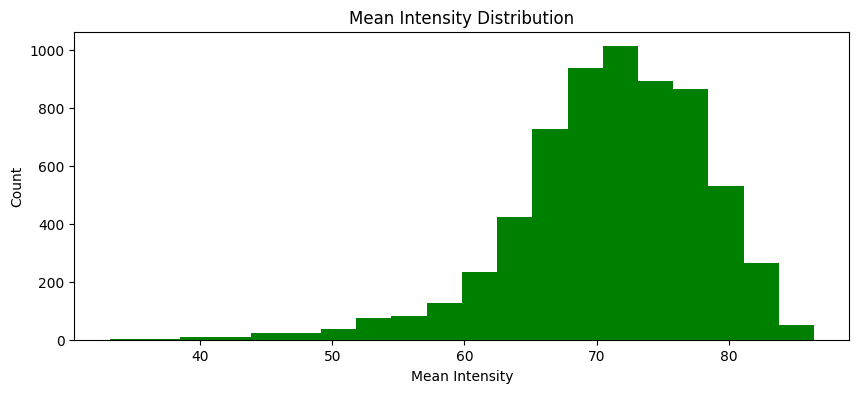

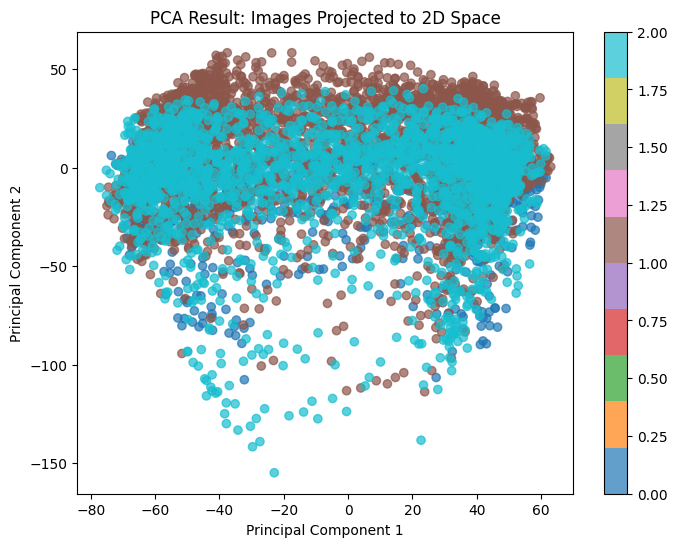

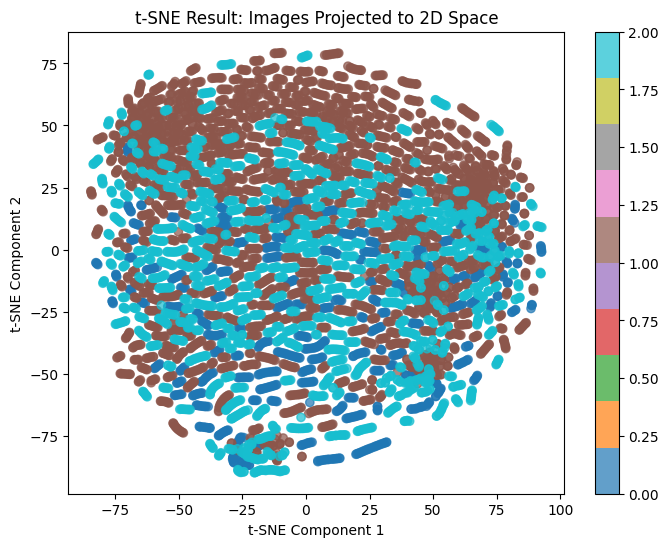

/tmp/ipykernel_52868/4064552026.py:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set2')


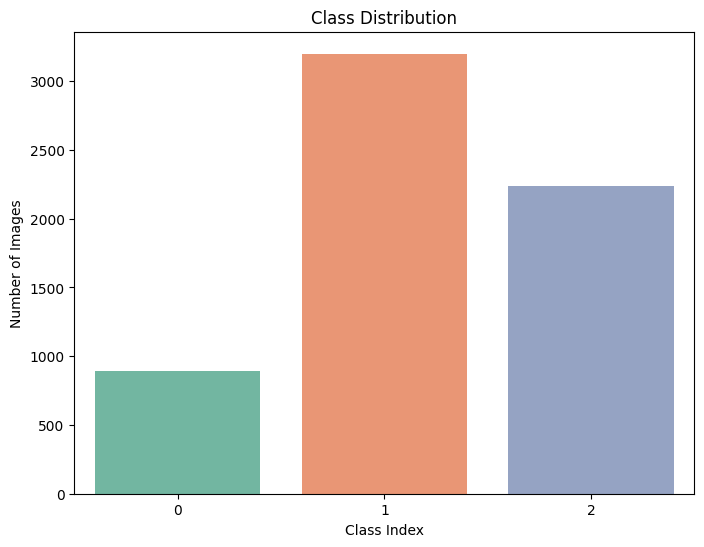

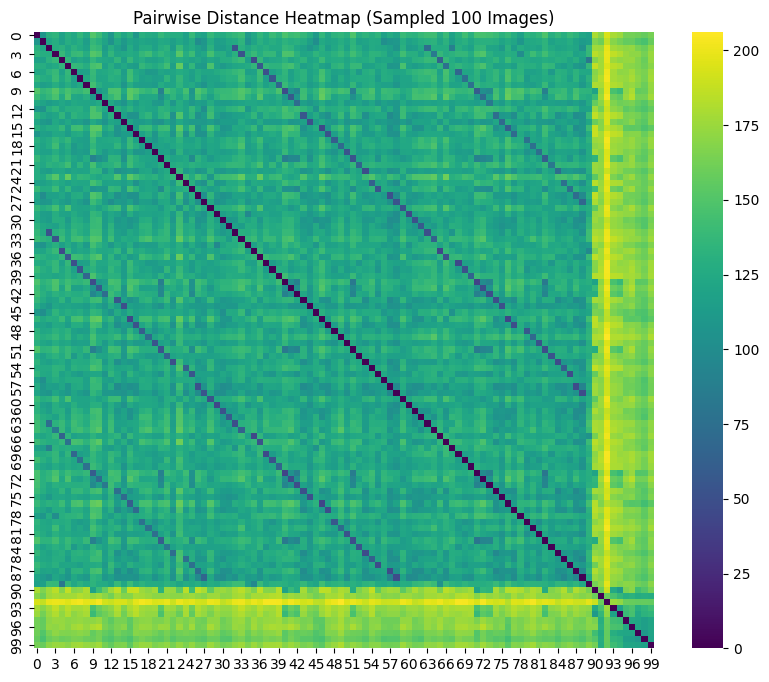

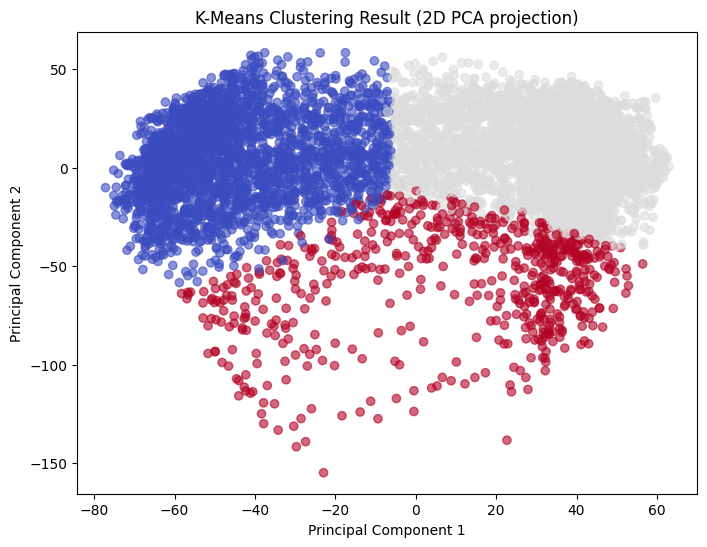

47113

In [8]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
from glob import glob
from pprint import pprint
import gc
import torch
import torchvision.transforms as transforms
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from torchvision import datasets
from sklearn.cluster import KMeans

# Load the dataset (assuming it's a directory of images)
dataset_path = '/home/idrone2/Desktop/rk/Alzheimer_dataset'  # Replace with your dataset path
dataset = datasets.ImageFolder(dataset_path)

# Analyze Image Dimensions
image_widths = []
image_heights = []
for image, _ in dataset:
    image_widths.append(image.size[0])
    image_heights.append(image.size[1])

# Statistics
print("Image width statistics:")
print(f"Mean: {np.mean(image_widths)}")
print(f"Median: {np.median(image_widths)}")
print(f"Min: {np.min(image_widths)}")
print(f"Max: {np.max(image_widths)}")

print("\nImage height statistics:")
print(f"Mean: {np.mean(image_heights)}")
print(f"Median: {np.median(image_heights)}")
print(f"Min: {np.min(image_heights)}")
print(f"Max: {np.max(image_heights)}")

# Visualize Image Dimension Distributions
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(image_widths, bins=20, color='blue', label='Width')
plt.xlabel('Width')
plt.ylabel('Count')
plt.title('Image Width Distribution')

plt.subplot(1, 2, 2)
plt.hist(image_heights, bins=20, color='orange', label='Height')
plt.xlabel('Height')
plt.ylabel('Count')
plt.title('Image Height Distribution')
plt.tight_layout()
plt.show()

# Visualize Scatter Plot of Width vs Height
plt.figure(figsize=(8, 6))
plt.scatter(image_widths, image_heights, alpha=0.5, color='teal')
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Image Dimensions Scatter Plot')
plt.show()

# Visualize Sample Images from Each Class
num_samples_per_class = 5
for class_name, class_index in dataset.class_to_idx.items():
    print(f"\nClass: {class_name}")
    plt.figure(figsize=(12, 8))
    for i, (image, label) in enumerate(dataset.imgs):
        if label == class_index and i < num_samples_per_class:
            img = plt.imread(image)
            plt.subplot(1, num_samples_per_class, i + 1)
            plt.imshow(img, cmap='gray')
            plt.axis('off')
    plt.show()

# Image Intensity Analysis
gray_images = [cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY) for image, _ in dataset]

mean_intensities = [np.mean(gray_image) for gray_image in gray_images]
median_intensities = [np.median(gray_image) for gray_image in gray_images]
std_dev_intensities = [np.std(gray_image) for gray_image in gray_images]

# Print Intensity Statistics
print("\nImage Intensity Statistics:")
print(f"Mean: {np.mean(mean_intensities)}")
print(f"Median: {np.median(mean_intensities)}")
print(f"Std Dev: {np.mean(std_dev_intensities)}")

# Visualize Mean Intensity Distribution
plt.figure(figsize=(10, 4))
plt.hist(mean_intensities, bins=20, color='green', label='Mean Intensity')
plt.xlabel('Mean Intensity')
plt.ylabel('Count')
plt.title('Mean Intensity Distribution')
plt.show()

# Additional EDA: PCA for Dimensionality Reduction
# Flatten the grayscale images
flat_images = np.array([gray_image.flatten() for gray_image in gray_images])

# Normalize and Standardize Images
scaler = StandardScaler()
scaled_images = scaler.fit_transform(flat_images)

# Apply PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_images)

# Visualize the PCA result
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7, c=[label for _, label in dataset], cmap='tab10')
plt.colorbar()
plt.title('PCA Result: Images Projected to 2D Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Apply t-SNE for Non-linear Dimensionality Reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_images)

# Visualize the t-SNE result
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.7, c=[label for _, label in dataset], cmap='tab10')
plt.colorbar()
plt.title('t-SNE Result: Images Projected to 2D Space')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# Dataset Composition - Distribution of Classes
class_counts = pd.Series([label for _, label in dataset]).value_counts()

# Visualize Class Distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set2')
plt.title('Class Distribution')
plt.xlabel('Class Index')
plt.ylabel('Number of Images')
plt.show()

# Pairwise Distance Heatmap (using Euclidean distance)
pairwise_dist = pairwise_distances(scaled_images, metric='euclidean')

# Visualize Pairwise Distance Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pairwise_dist[:100, :100], cmap='viridis')
plt.title('Pairwise Distance Heatmap (Sampled 100 Images)')
plt.show()

# Clustering Images using K-Means
kmeans = KMeans(n_clusters=len(dataset.classes), random_state=42)
kmeans.fit(scaled_images)

# Visualize Clustering Result using PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans.labels_, cmap='coolwarm', alpha=0.6)
plt.title('K-Means Clustering Result (2D PCA projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Free up memory (if needed)
gc.collect()


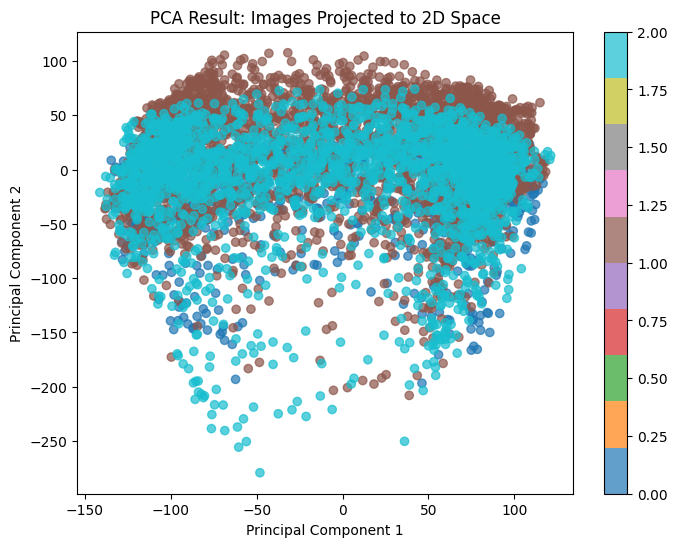

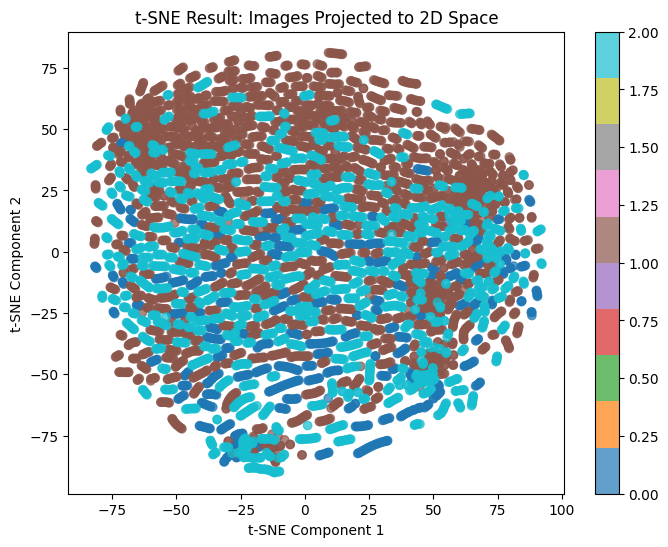

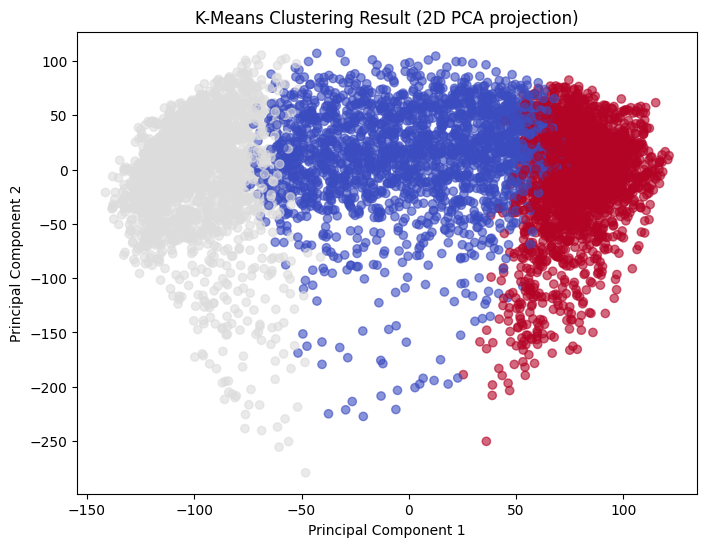

14511

In [ ]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
from glob import glob
import gc
import torch
import torchvision.transforms as transforms
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from torchvision import datasets
from sklearn.cluster import KMeans

# Load the dataset (assuming it's a directory of images)
dataset_path = '/home/idrone2/Desktop/rk/Alzheimer_dataset'  # Replace with your dataset path
dataset = datasets.ImageFolder(dataset_path)

# Resize images to the same shape (e.g., 224x224)
resize_transform = transforms.Resize((224, 224))
resized_images = [resize_transform(image) for image, _ in dataset]

# Convert to grayscale (if needed) and flatten the images
gray_images = [cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY) for image in resized_images]
flat_images = np.array([gray_image.flatten() for gray_image in gray_images])

# Normalize and Standardize Images
scaler = StandardScaler()
scaled_images = scaler.fit_transform(flat_images)

# Apply PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_images)

# Visualize the PCA result
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7, c=[label for _, label in dataset], cmap='tab10')
plt.colorbar()
plt.title('PCA Result: Images Projected to 2D Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Apply t-SNE for Non-linear Dimensionality Reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_images)

# Visualize the t-SNE result
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.7, c=[label for _, label in dataset], cmap='tab10')
plt.colorbar()
plt.title('t-SNE Result: Images Projected to 2D Space')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# Clustering Images using K-Means
kmeans = KMeans(n_clusters=len(dataset.classes), random_state=42)
kmeans.fit(scaled_images)

# Visualize Clustering Result using PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans.labels_, cmap='coolwarm', alpha=0.6)
plt.title('K-Means Clustering Result (2D PCA projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Free up memory (if needed)
gc.collect()


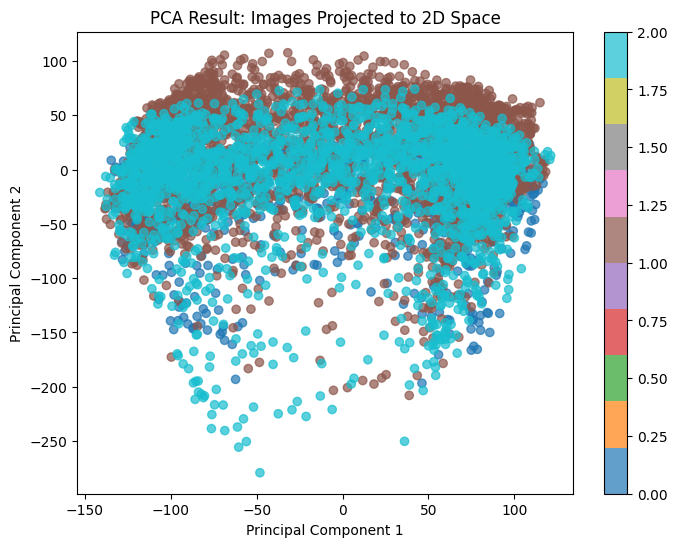

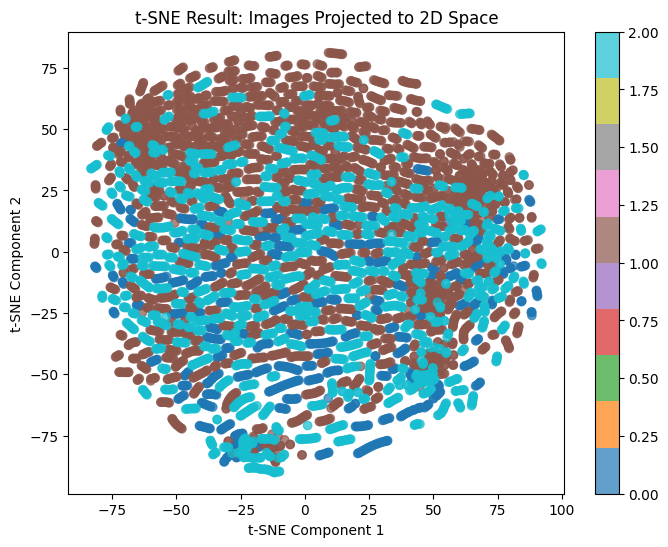

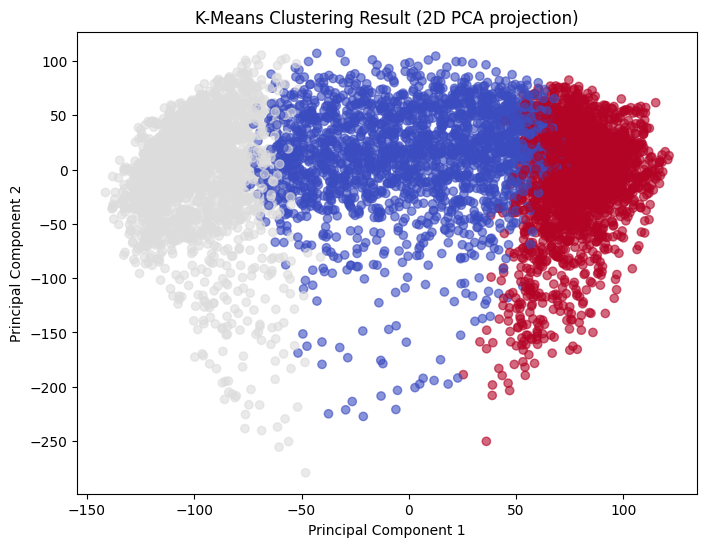

14511

In [9]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
from glob import glob
import gc
import torch
import torchvision.transforms as transforms
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from torchvision import datasets
from sklearn.cluster import KMeans

# Load the dataset (assuming it's a directory of images)
dataset_path = '/home/idrone2/Desktop/rk/Alzheimer_dataset'  # Replace with your dataset path
dataset = datasets.ImageFolder(dataset_path)

# Resize images to the same shape (e.g., 224x224)
resize_transform = transforms.Resize((224, 224))
resized_images = [resize_transform(image) for image, _ in dataset]

# Convert to grayscale (if needed) and flatten the images
gray_images = [cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY) for image in resized_images]
flat_images = np.array([gray_image.flatten() for gray_image in gray_images])

# Normalize and Standardize Images
scaler = StandardScaler()
scaled_images = scaler.fit_transform(flat_images)

# Apply PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_images)

# Visualize the PCA result
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7, c=[label for _, label in dataset], cmap='tab10')
plt.colorbar()
plt.title('PCA Result: Images Projected to 2D Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Apply t-SNE for Non-linear Dimensionality Reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_images)

# Visualize the t-SNE result
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.7, c=[label for _, label in dataset], cmap='tab10')
plt.colorbar()
plt.title('t-SNE Result: Images Projected to 2D Space')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# Clustering Images using K-Means
kmeans = KMeans(n_clusters=len(dataset.classes), random_state=42)
kmeans.fit(scaled_images)

# Visualize Clustering Result using PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans.labels_, cmap='coolwarm', alpha=0.6)
plt.title('K-Means Clustering Result (2D PCA projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Free up memory (if needed)
gc.collect()
